<a href="https://colab.research.google.com/github/nilanahar/Investigating_Impact_of_ESG_Factors_On_Financial_Bankruptcy_Modelling/blob/main/823_Finance_Project_Predicting_Bankruptcy_using_ESG_factors_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import requests
import json
import time
import yahooquery as yq
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


# 1. Data Collection - S&P 500 2023 Tickers Data

In [ ]:
# TICKERS FROM LAWRENCE
tickers_df_L = pd.DataFrame({
    "Symbol": [
    "A", "AAL", "AAPL", "ABBV", "ABT", "ACGL", "ACN", "ADBE", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AES", "AFL",
    "AIG", "AIZ", "AJG", "AKAM", "ALB", "ALL", "ALLE", "AMAT", "AME", "AMGN", "AMP", "AMT", "AMZN", "ANET", "ANSS",
    "AOS", "APA", "APD", "APH", "APTV", "ARE", "ATO", "AVB", "AVGO", "AVY", "AWK", "AXP", "AZO", "BA", "BAC", "BALL",
    "BAX", "BBWI", "BBY", "BDX", "BEN", "BG", "BIIB", "BIO", "BK", "BKNG", "BLK", "BMY", "BR", "BRO", "BSX", "BWA",
    "BX", "BXP", "C", "CAG", "CAH", "CAT", "CB", "CBOE", "CBRE", "CCI", "CCL", "CDNS", "CDW", "CE", "CF", "CFG", "CHD",
    "CHRW", "CHTR", "CI", "CINF", "CL", "CLX", "CMCSA", "CME", "CMG", "CMI", "CMS", "CNC", "CNP", "COF", "COO", "COP",
    "COR", "COST", "CPB", "CPRT", "CPT", "CRM", "CSCO", "CSGP", "CSX", "CTAS", "CTRA", "CTSH", "CVS", "CVX", "D", "DAL",
    "DD", "DE", "DFS", "DG", "DGX", "DHI", "DHR", "DIS", "DLR", "DLTR", "DOV", "DPZ", "DRI", "DTE", "DUK", "DVA", "DVN",
    "DXCM", "EA", "EBAY", "ECL", "ED", "EFX", "EG", "EIX", "EL", "ELV", "EMN", "EMR", "EOG", "EQIX", "EQR", "EQT", "ES",
    "ESS", "ETN", "ETR", "EW", "EXC", "EXPD", "EXPE", "EXR", "F", "FAST", "FCX", "FDS", "FDX", "FE", "FFIV", "FI", "FIS",
    "FITB", "FMC", "FRT", "FTNT", "FTV", "GD", "GE", "GEN", "GILD", "GIS", "GL", "GLW", "GM", "GOOGL", "GPC", "GPN",
    "GRMN", "GS", "GWW", "HAL", "HAS", "HBAN", "HCA", "HD", "HES", "HIG", "HLT", "HOLX", "HON", "HPE", "HPQ", "HRL",
    "HSIC", "HST", "HSY", "HUBB", "HUM", "IBM", "ICE", "IDXX", "IEX", "IFF", "INCY", "INTC", "INTU", "IP", "IPG", "IQV",
    "IRM", "ISRG", "IT", "ITW", "IVZ", "J", "JBHT", "JCI", "JKHY", "JNJ", "JNPR", "JPM", "K", "KEY", "KEYS", "KHC", "KIM",
    "KLAC", "KMB", "KMI", "KMX", "KO", "KR", "L", "LDOS", "LEN", "LH", "LKQ", "LLY", "LMT", "LNT", "LOW", "LRCX", "LULU",
    "LUV", "LVS", "LYB", "MA", "MAA", "MAR", "MAS", "MCD", "MCHP", "MCK", "MCO", "MDLZ", "MDT", "MET", "META", "MGM",
    "MHK", "MKC", "MLM", "MMC", "MMM", "MNST", "MO", "MOS", "MPC", "MRK", "MRO", "MS", "MSCI", "MSFT", "MSI", "MTB",
    "MTD", "MU", "NCLH", "NDAQ", "NDSN", "NEE", "NEM", "NFLX", "NI", "NKE", "NOC", "NOW", "NRG", "NSC", "NTAP", "NTRS",
    "NUE", "NVDA", "NVR", "NWSA", "NXPI", "O", "OKE", "OMC", "ON", "ORCL", "ORLY", "OXY", "PANW", "PARA", "PAYX", "PCAR",
    "PCG", "PEG", "PEP", "PFE", "PFG", "PG", "PGR", "PH", "PHM", "PKG", "PLD", "PM", "PNC", "PNR", "PNW", "PPG", "PPL",
    "PRU", "PSA", "PSX", "PTC", "PWR", "PYPL", "QCOM", "QRVO", "RCL", "REG", "REGN", "RF", "RJF", "RL", "RMD", "ROK",
    "ROL", "ROP", "ROST", "RSG", "RVTY", "SBAC", "SBUX", "SCHW", "SHW", "SJM", "SLB", "SNA", "SNPS", "SO", "SPG", "SPGI",
    "SRE", "STLD", "STT", "STX", "STZ", "SWK", "SWKS", "SYF", "SYK", "SYY", "T", "TAP", "TDG", "TEL", "TER", "TFX",
    "TGT", "TJX", "TMO", "TMUS", "TPR", "TRGP", "TRMB", "TROW", "TRV", "TSCO", "TSLA", "TSN", "TT", "TXN", "TXT", "UAL",
    "UDR", "UHS", "ULTA", "UNH", "UNP", "UPS", "URI", "USB", "V", "VLO", "VMC", "VRSK", "VRSN", "VRTX", "VTR", "VZ",
    "WAB", "WAT", "WBA", "WDC", "WEC", "WELL", "WFC", "WM", "WMB", "WMT", "WRB", "WTW", "WY", "WYNN", "XEL", "XOM",
    "XYL", "YUM", "ZBH", "ZTS"]})

tickers_df_2023_snp = pd.DataFrame({
    'Symbol': [
        'MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AFL', 'A', 'APD', 'AKAM', 'ACI', 'ARE', 'ALGN',
        'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP',
        'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ',
        'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO',
        'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW',
        'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE',
        'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO',
        'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT',
        'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL',
        'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISH', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK',
        'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX',
        'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST',
        'FRT', 'FDX', 'FITB', 'FIS', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN',
        'IT', 'GE', 'GNRC', 'GILD', 'GL', 'GPN', 'GM', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES',
        'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW',
        'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM',
        'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KMX', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI',
        'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT',
        'L', 'LOW', 'LUMN', 'LYB', 'MTB',  'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD',
        'MCK', 'MDT', 'MRK', 'META', 'MET', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR',
        'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE',
        'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NOV', 'NXPI', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXST', 'ORLY', 'OXY',
        'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP',
        'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU',
        'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'RE', 'RJF', 'RTX', 'O', 'REG', 'RF', 'RSG', 'RMD', 'RHI', 'ROK',
        'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS',
        'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW',
        'TPR', 'TRGP', 'TGT', 'TEL',  'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV',
        'ALK', 'TTWO', 'TDY'
    ]
})

# Merge the two dataframes
merged_tickers = pd.concat([tickers_df_L, tickers_df_2023_snp], ignore_index=True)

# Get unique tickers by dropping duplicates
unique_tickers = merged_tickers.drop_duplicates(subset='Symbol')
# Sort unique_tickers alphabetically by Symbol
unique_tickers = unique_tickers.sort_values('Symbol').reset_index(drop=True)

#### Problematic Tickers (Removing)

In [ ]:
problematic_tickers = ['ABC', 'ATVI', 'BF.B', 'BRK.B', 'CDAY', 'DISH', 'FISV', 'FLT',
                       'INFO', 'MRO', 'NLOK', 'PBCT', 'PEAK', 'PKI', 'PXD', 'RE', 'SIVB',
                       'ALK']


working_tickers = unique_tickers[~unique_tickers['Symbol'].isin(problematic_tickers)]
remaining_tickers = unique_tickers[unique_tickers['Symbol'].isin(problematic_tickers)]

# Check if working_tickers and unique_tickers contain the same data
are_identical = working_tickers.equals(unique_tickers)
print(f"Are working_tickers and unique_tickers identical? {are_identical}")

if not are_identical:
    # Show differences in number of rows
    print(f"\nNumber of rows:")
    print(f"working_tickers: {len(working_tickers)}")
    print(f"unique_tickers: {len(unique_tickers)}")

Are working_tickers and unique_tickers identical? False

Number of rows:
working_tickers: 483
unique_tickers: 501


### 1.1 Financial Data

In [ ]:
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)

    # Fetch financial statements
    income_statement = stock.financials.T  # Transpose to get years as rows
    balance_sheet = stock.balance_sheet.T
    cashflow = stock.cashflow.T

    # Ensure the index is a DatetimeIndex
    if not isinstance(income_statement.index, pd.DatetimeIndex):
        income_statement.index = pd.to_datetime(income_statement.index).normalize()
        balance_sheet.index = pd.to_datetime(balance_sheet.index).normalize()
        cashflow.index = pd.to_datetime(cashflow.index).normalize()

    # Find the latest date in 2023
    available_dates = [date for date in income_statement.index if date.year == 2023]
    if not available_dates:
        print(f"No 2023 data for {ticker}. Available dates: {income_statement.index}")
        return None

    latest_date = max(available_dates)

    # Extract data for the latest date in 2023
    financial_data = {}

    for col in income_statement.columns:
        financial_data[f'Income_{col}'] = income_statement.loc[latest_date, col] if col in income_statement.columns else None
    for col in balance_sheet.columns:
        financial_data[f'Balance_{col}'] = balance_sheet.loc[latest_date, col] if col in balance_sheet.columns else None
    for col in cashflow.columns:
        financial_data[f'CashFlow_{col}'] = cashflow.loc[latest_date, col] if col in cashflow.columns else None

    # Extract Altman Z-Score relevant columns
    financial_data['Working_Capital'] = financial_data.get('Balance_Total Current Assets', 0) - financial_data.get('Balance_Total Current Liabilities', 0)
    financial_data['Retained_Earnings'] = financial_data.get('Balance_Retained Earnings', None)
    financial_data['EBIT'] = financial_data.get('Income_EBIT', None)

    # Handle market cap with error handling
    try:
        if stock.fast_info and "marketCap" in stock.fast_info:
            financial_data['Market_Value_of_Equity'] = stock.fast_info["marketCap"]
        else:
            print(f"Market cap data not available for {ticker}")
            financial_data['Market_Value_of_Equity'] = None
    except Exception as e:
        print(f"Error fetching market cap for {ticker}: {e}")
        financial_data['Market_Value_of_Equity'] = None

    financial_data['Total_Assets'] = financial_data.get('Balance_Total Assets', None)
    financial_data['Total_Liabilities'] = financial_data.get('Balance_Total Liabilities Net Minority Interest', None)
    financial_data['Revenue'] = financial_data.get('Income_Total Revenue', None)

    return financial_data


In [ ]:
financial_data = {ticker: get_financial_data(ticker) for ticker in working_tickers['Symbol']}

financial_df = pd.DataFrame.from_dict(financial_data, orient='index').reset_index()
financial_df.rename(columns={'index': 'Symbol'}, inplace=True)

financial_df.head()

### 1.2 Working Capital

In [ ]:
def get_working_capital(ticker):
    try:
        company = yf.Ticker(ticker)
        balance_sheet = company.balance_sheet.T  # Transpose to get years as rows

        # Ensure the index is a DatetimeIndex
        if not isinstance(balance_sheet.index, pd.DatetimeIndex):
            balance_sheet.index = pd.to_datetime(balance_sheet.index).normalize()

        # Find the latest date in 2023
        available_dates = [date for date in balance_sheet.index if date.year == 2023]
        if not available_dates:
            print(f"No 2023 data for {ticker}. Available dates: {balance_sheet.index}")
            return None

        latest_date = max(available_dates)

        # Extract relevant current assets if available
        current_assets = 0
        for key in ['Cash And Cash Equivalents', 'Receivables', 'Inventories', 'Other Current Assets']:
            if key in balance_sheet.columns:
                current_assets += balance_sheet.loc[latest_date, key]

        # Extract relevant current liabilities if available
        current_liabilities = 0
        for key in ['Accounts Payable', 'Short Long Term Debt', 'Other Current Liabilities']:
            if key in balance_sheet.columns:
                current_liabilities += balance_sheet.loc[latest_date, key]

        # Calculate working capital
        working_capital = current_assets - current_liabilities
        return working_capital

    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None

# Extract working capital for each company in the list
working_capital_data = {ticker: get_working_capital(ticker) for ticker in working_tickers['Symbol']}

# for ticker in tickers_df:
#     working_capital = get_working_capital(ticker)
#     if working_capital is not None:
#         working_capital_data[ticker] = working_capital

# Convert to DataFrame
working_capital_df = pd.DataFrame(
    list(working_capital_data.items()),
    columns=['Symbol', 'Working_Capital_x']
)

# Print and save results
working_capital_df.head()

,Symbol,Working_Capital_x
0,A,2.737000e+09
1,AAL,9.090000e+08
2,AAPL,-6.976000e+09
3,ABBV,2.521300e+10
4,ABT,1.142200e+10


### 1.3 ESG Data

In [ ]:

esg_df = pd.read_csv(r"C:\Users\Nila\iCloudDrive\Documents\Smith School of Business (MMAI)\823 AI in Finance\Project\sp500_esg_data.csv")
# Add 'esg_' prefix to all columns except 'Symbol'
esg_df.columns = ['Symbol' if col == 'Symbol' else f'esg_{col}' for col in esg_df.columns]
esg_df.head()

,Symbol,esg_Full Name,esg_GICS Sector,esg_GICS Sub-Industry,esg_environmentScore,esg_socialScore,esg_governanceScore,esg_totalEsg,esg_highestControversy,esg_percentile,esg_ratingYear,esg_ratingMonth,esg_marketCap,esg_beta,esg_overallRisk
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.10,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8
1,AAL,American Airlines Group,Industrials,Passenger Airlines,9.94,11.65,4.76,26.35,2.0,54.48,2023.0,9.0,7335383552,1.433,10
2,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.46,7.39,9.37,17.22,3.0,17.82,2023.0,9.0,3296096681984,1.240,1
3,ABBV,AbbVie,Health Care,Biotechnology,2.38,17.19,10.36,29.93,3.0,68.62,2023.0,9.0,341698445312,0.619,6
4,ABT,Abbott Laboratories,Health Care,Health Care Equipment,2.27,14.24,8.33,24.83,3.0,48.27,2023.0,9.0,205534380032,0.722,7


In [ ]:
# Merge working_capital_df with esg_df
merged_df = pd.merge(financial_df, working_capital_df, on='Symbol', how='left')
merged_df = pd.merge(merged_df, esg_df, on='Symbol', how='left')

# Print shape to verify merge
print("Shape after 2nd merge:", merged_df.shape)

# Print first few rows to verify data
merged_df.head()

Shape after 2nd merge: (483, 351)


,Symbol,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Net Income From Continuing Operation Net Minority Interest,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_EBITDA,Income_EBIT,Income_Net Interest Income,...,esg_socialScore,esg_governanceScore,esg_totalEsg,esg_highestControversy,esg_percentile,esg_ratingYear,esg_ratingMonth,esg_marketCap,esg_beta,esg_overallRisk
0,A,0.000000e+00,0.074000,1.705000e+09,1.240000e+09,2.710000e+08,3.368000e+09,1.705000e+09,1.434000e+09,-4.400000e+07,...,6.42,6.10,13.64,2.0,7.98,2023.0,9.0,3.975183e+10,1.054,8.0
1,AAL,-2.589911e+08,0.266726,6.491000e+09,8.220000e+08,2.254000e+09,4.097800e+10,5.520000e+09,3.266000e+09,-1.554000e+09,...,11.65,4.76,26.35,2.0,54.48,2023.0,9.0,7.335384e+09,1.433,10.0
2,AAPL,0.000000e+00,0.147000,1.258200e+11,9.699500e+10,1.151900e+10,2.141370e+11,1.258200e+11,1.143010e+11,-1.830000e+08,...,7.39,9.37,17.22,3.0,17.82,2023.0,9.0,3.296097e+12,1.240,1.0
3,ABBV,-3.212000e+07,0.220000,1.731800e+10,4.863000e+09,8.698000e+09,2.041500e+10,1.717200e+10,8.474000e+09,-1.684000e+09,...,17.19,10.36,29.93,3.0,68.62,2023.0,9.0,3.416984e+11,0.619,6.0
4,ABT,-5.781000e+06,0.141000,1.058500e+10,5.723000e+09,3.243000e+09,1.669800e+10,1.054400e+10,7.301000e+09,-2.520000e+08,...,14.24,8.33,24.83,3.0,48.27,2023.0,9.0,2.055344e+11,0.722,7.0


### 1.4 Altman Z-Score Data

In [ ]:
# Calculate Altman Z-Score components
# Z = 1.2X1 + 1.4X2 + 3.3X3 + 0.6X4 + 1.0X5
# Where:
# X1 = Working Capital / Total Assets
# X2 = Retained Earnings / Total Assets
# X3 = EBIT / Total Assets
# X4 = Market Value of Equity / Total Debt
# X5 = Sales / Total Assets

# Calculate ratios
merged_df['X1'] = merged_df['Working_Capital'] / merged_df['Total_Assets']
merged_df['X2'] = merged_df['Retained_Earnings'] / merged_df['Total_Assets']
merged_df['X3'] = merged_df['EBIT'] / merged_df['Total_Assets']
merged_df['X4'] = merged_df['Market_Value_of_Equity'] / merged_df['Total_Liabilities']
merged_df['X5'] = merged_df['Revenue'] / merged_df['Total_Assets']

# Calculate Z-Score
merged_df['Altman_Z_Score'] = (1.2 * merged_df['X1'] +
                              1.4 * merged_df['X2'] +
                              3.3 * merged_df['X3'] +
                              0.6 * merged_df['X4'] +
                              1.0 * merged_df['X5'])

# Add bankruptcy risk categories
merged_df['Bankruptcy_Risk'] = pd.cut(merged_df['Altman_Z_Score'],
                                    bins=[-float('inf'), 1.81, 2.99, float('inf')],
                                    labels=['High Risk', 'Grey Zone', 'Safe Zone'])

# Display results
print("\nAltman Z-Score Summary:")
print(merged_df[['Symbol', 'Altman_Z_Score', 'Bankruptcy_Risk']].head())
print("\nBankruptcy Risk Distribution:")
print(merged_df['Bankruptcy_Risk'].value_counts())



Altman Z-Score Summary:
  Symbol  Altman_Z_Score Bankruptcy_Risk
0      A        5.982211       Safe Zone
1    AAL        0.932192       High Risk
2   AAPL        9.506919       Safe Zone
3   ABBV        2.246525       Grey Zone
4    ABT        5.572858       Safe Zone

Bankruptcy Risk Distribution:
Bankruptcy_Risk
Safe Zone    219
High Risk    124
Grey Zone    110
Name: count, dtype: int64


In [ ]:
# Save merged dataframe to CSV
merged_df.to_csv('(1)_823_Finance_Project_Merged_Financial+ESG_data.csv', index=False)

# 2 Exploratory Data Analysis

In [ ]:
df = pd.read_csv('(1)_823_Finance_Project_Merged_Financial+ESG_data.csv')
df.head()

,Symbol,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Net Income From Continuing Operation Net Minority Interest,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_EBITDA,Income_EBIT,Income_Net Interest Income,...,esg_marketCap,esg_beta,esg_overallRisk,X1,X2,X3,X4,X5,Altman_Z_Score,Bankruptcy_Risk
0,A,0.000000e+00,0.074000,1.705000e+09,1.240000e+09,2.710000e+08,3.368000e+09,1.705000e+09,1.434000e+09,-4.400000e+07,...,3.975183e+10,1.054,8.0,0.0,0.072656,0.133234,8.009931,0.634860,5.982211,Safe Zone
1,AAL,-2.589911e+08,0.266726,6.491000e+09,8.220000e+08,2.254000e+09,4.097800e+10,5.520000e+09,3.266000e+09,-1.554000e+09,...,7.335384e+09,1.433,10.0,0.0,-0.121935,0.051794,0.158082,0.837134,0.932192,High Risk
2,AAPL,0.000000e+00,0.147000,1.258200e+11,9.699500e+10,1.151900e+10,2.141370e+11,1.258200e+11,1.143010e+11,-1.830000e+08,...,3.296097e+12,1.240,1.0,0.0,-0.000607,0.324182,12.251486,1.087077,9.506919,Safe Zone
3,ABBV,-3.212000e+07,0.220000,1.731800e+10,4.863000e+09,8.698000e+09,2.041500e+10,1.717200e+10,8.474000e+09,-1.684000e+09,...,3.416984e+11,0.619,6.0,0.0,-0.007423,0.062905,2.743521,0.403219,2.246525,Grey Zone
4,ABT,-5.781000e+06,0.141000,1.058500e+10,5.723000e+09,3.243000e+09,1.669800e+10,1.054400e+10,7.301000e+09,-2.520000e+08,...,2.055344e+11,0.722,7.0,0.0,0.512935,0.099721,6.629728,0.547832,5.572858,Safe Zone


### 2.1 Null Values Check

In [ ]:
# Calculate percentage of null values
print("\nPercentage of Null Values:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of Null Values:
Symbol                                                               0.000000
Income_Tax Effect Of Unusual Items                                   0.000000
Income_Tax Rate For Calcs                                            0.000000
Income_Normalized EBITDA                                             9.730849
Income_Net Income From Continuing Operation Net Minority Interest    0.207039
                                                                       ...   
X3                                                                   5.590062
X4                                                                   0.207039
X5                                                                   0.207039
Altman_Z_Score                                                       6.211180
Bankruptcy_Risk                                                      6.211180
Length: 358, dtype: float64


### 2.2 Basic Information

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Columns: 358 entries, Symbol to Bankruptcy_Risk
dtypes: float64(352), int64(1), object(5)
memory usage: 1.3+ MB
None

Basic Statistics:
       Income_Tax Effect Of Unusual Items  Income_Tax Rate For Calcs  \
count                        4.830000e+02                 483.000000   
mean                        -3.768422e+07                   0.193347   
std                          1.880306e+08                   0.068886   
min                         -2.163630e+09                   0.001312   
25%                         -3.383980e+07                   0.161500   
50%                         -1.600000e+06                   0.210000   
75%                          0.000000e+00                   0.232710   
max                          1.176392e+09                   0.395000   

       Income_Normalized EBITDA  \
count              4.360000e+02   
mean               6.422630e+09   
std                1.313

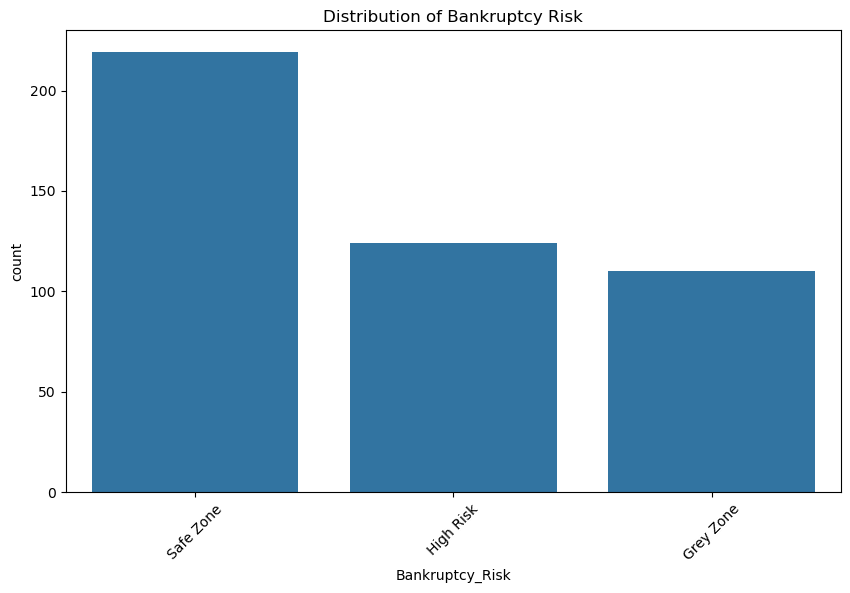

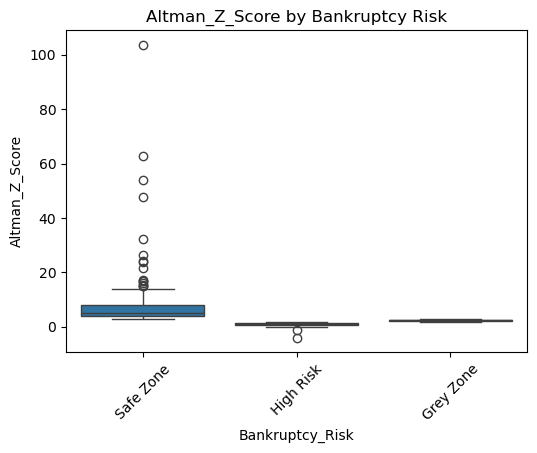

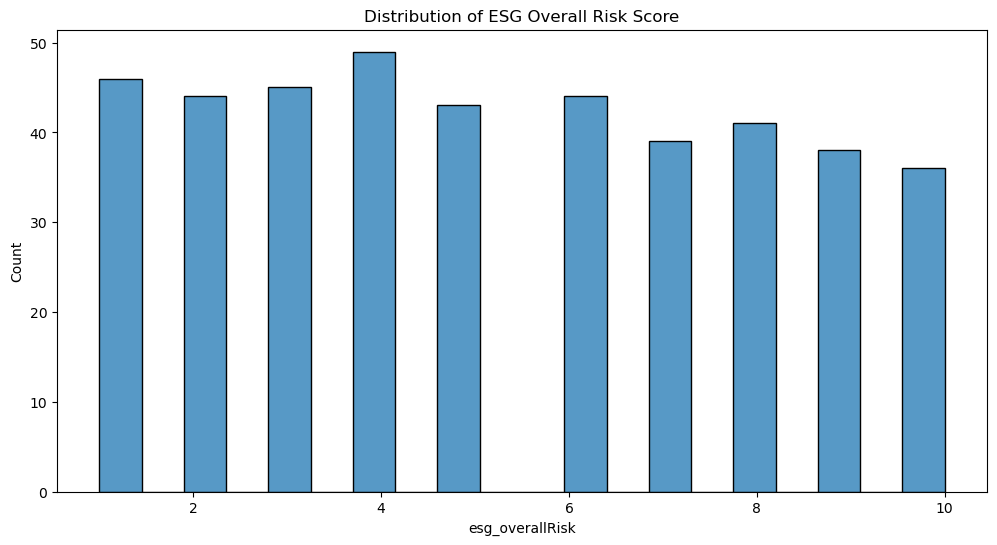

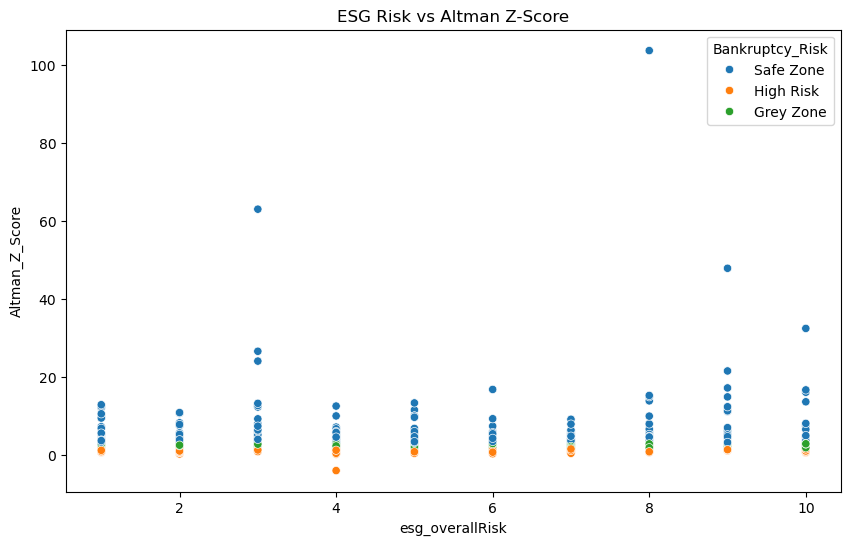

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check distribution of target variable
print("\nDistribution of Bankruptcy Risk:")
bankruptcy_dist = df['Bankruptcy_Risk'].value_counts()
print(bankruptcy_dist)
print("\nPercentage Distribution:")
print(bankruptcy_dist / len(df) * 100)

# Visualize distribution of bankruptcy risk
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Bankruptcy_Risk')
plt.title('Distribution of Bankruptcy Risk')
plt.xticks(rotation=45)
plt.show()


# Box plots for key financial ratios by bankruptcy risk
financial_metric = ['Altman_Z_Score']
plt.figure(figsize=(15, 8))
for i, ratio in enumerate(financial_metric, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Bankruptcy_Risk', y=ratio)
    plt.xticks(rotation=45)
    plt.title(f'{ratio} by Bankruptcy Risk')
plt.tight_layout()
plt.show()

# ESG score distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='esg_overallRisk', bins=20)
plt.title('Distribution of ESG Overall Risk Score')
plt.show()

# Relationship between ESG risk and Altman Z-Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='esg_overallRisk', y='Altman_Z_Score', hue='Bankruptcy_Risk')
plt.title('ESG Risk vs Altman Z-Score')
plt.show()



Average Altman Z-Score by ESG Risk Level:
                 mean  count
esg_overallRisk             
1.0              4.19     43
2.0              3.76     42
3.0              6.93     41
4.0              3.06     47
5.0              3.93     39
6.0              3.79     42
7.0              3.07     35
8.0              6.99     39
9.0              6.42     33
10.0             4.62     34

Bankruptcy Risk Distribution (%) by ESG Risk Level:
Bankruptcy_Risk  Grey Zone  High Risk  Safe Zone
esg_overallRisk                                 
1.0                  16.28      27.91      55.81
2.0                  14.29      30.95      54.76
3.0                  26.83      12.20      60.98
4.0                  19.15      38.30      42.55
5.0                  25.64      25.64      48.72
6.0                  26.19      14.29      59.52
7.0                  22.86      37.14      40.00
8.0                  28.21      17.95      53.85
9.0                  24.24      27.27      48.48
10.0             

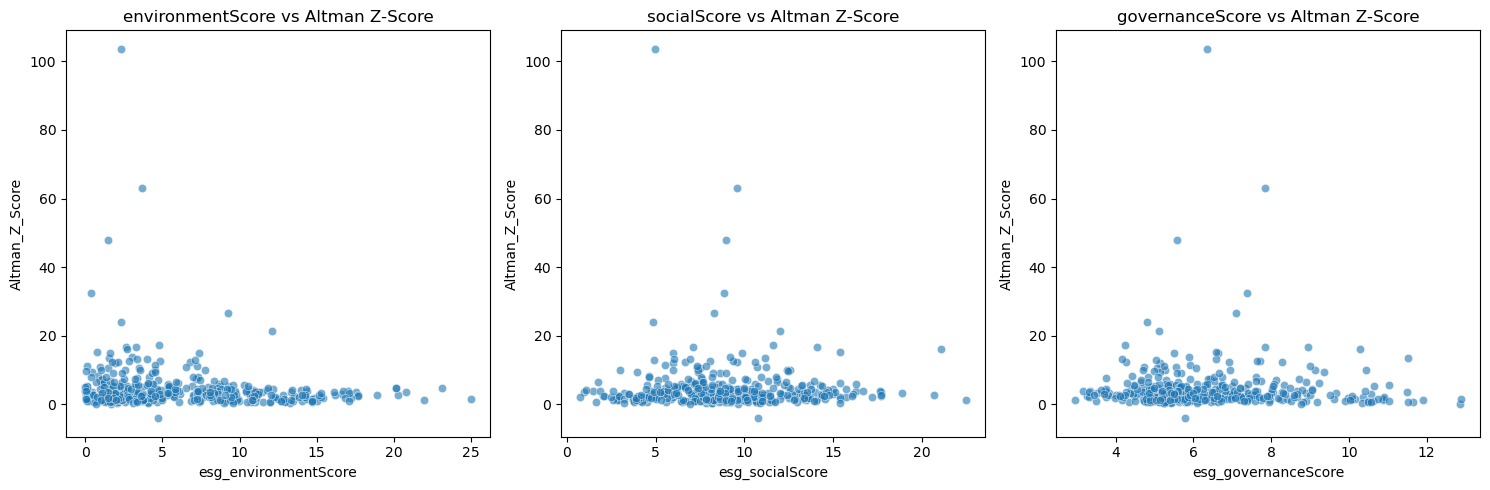


Average ESG Metrics by Bankruptcy Risk Category:
                 esg_environmentScore  esg_socialScore  esg_governanceScore
Bankruptcy_Risk                                                            
Grey Zone                        6.06             9.03                 6.26
High Risk                        6.81             8.96                 6.90
Safe Zone                        5.66             8.96                 6.25


In [ ]:
# Additional insights into ESG and financial relationships

# Calculate average Altman Z-Score for each ESG risk level
avg_z_by_esg = df.groupby('esg_overallRisk')['Altman_Z_Score'].agg(['mean', 'count']).round(2)
print("\nAverage Altman Z-Score by ESG Risk Level:")
print(avg_z_by_esg)

# Calculate bankruptcy risk distribution for different ESG risk levels
esg_bankruptcy_dist = pd.crosstab(df['esg_overallRisk'], df['Bankruptcy_Risk'], normalize='index') * 100
print("\nBankruptcy Risk Distribution (%) by ESG Risk Level:")
print(esg_bankruptcy_dist.round(2))

# Visualize relationship between ESG components and Altman Z-Score
esg_components = ['esg_environmentScore', 'esg_socialScore', 'esg_governanceScore']
plt.figure(figsize=(15, 5))
for i, component in enumerate(esg_components, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=component, y='Altman_Z_Score', alpha=0.6)
    plt.title(f'{component.split("_")[1]} vs Altman Z-Score')
plt.tight_layout()
plt.show()

# Calculate average ESG metrics by bankruptcy risk category
esg_by_bankruptcy = df.groupby('Bankruptcy_Risk')[esg_components].mean().round(2)
print("\nAverage ESG Metrics by Bankruptcy Risk Category:")
print(esg_by_bankruptcy)


### 2.3 Target Variable Check & Data Cleaning

In [ ]:
# Fill null values in Bankruptcy_Risk with 'High Risk'
df['Bankruptcy_Risk'] = df['Bankruptcy_Risk'].fillna('High Risk')
df['Bankruptcy_Risk'].isnull().sum()

0

In [ ]:
# Drop columns where all values are null
null_columns = df.columns[df.isnull().all()].tolist()
df = df.drop(columns=null_columns)
df = df.drop(['Symbol','esg_Full Name', 'esg_GICS Sector', 'esg_GICS Sub-Industry', 'Income_Depletion Income Statement'], axis=1)

print("Number of columns dropped:", len(null_columns))
print("Shape after dropping null columns:", df.shape)

Number of columns dropped: 3
Shape after dropping null columns: (483, 350)


In [ ]:
df.to_csv('(2)_823_Finance_Project_Cleaned_All_Data.csv', index=False)

# 3 Data Preprocessing

In [ ]:
df = pd.read_csv('(2)_823_Finance_Project_Cleaned_All_Data.csv')
df.head()

,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Net Income From Continuing Operation Net Minority Interest,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_EBITDA,Income_EBIT,Income_Net Interest Income,Income_Interest Expense,...,esg_marketCap,esg_beta,esg_overallRisk,X1,X2,X3,X4,X5,Altman_Z_Score,Bankruptcy_Risk
0,0.000000e+00,0.074000,1.705000e+09,1.240000e+09,2.710000e+08,3.368000e+09,1.705000e+09,1.434000e+09,-4.400000e+07,9.500000e+07,...,3.975183e+10,1.054,8.0,0.0,0.072656,0.133234,8.009931,0.634860,5.982211,Safe Zone
1,-2.589911e+08,0.266726,6.491000e+09,8.220000e+08,2.254000e+09,4.097800e+10,5.520000e+09,3.266000e+09,-1.554000e+09,2.145000e+09,...,7.335384e+09,1.433,10.0,0.0,-0.121935,0.051794,0.158082,0.837134,0.932192,High Risk
2,0.000000e+00,0.147000,1.258200e+11,9.699500e+10,1.151900e+10,2.141370e+11,1.258200e+11,1.143010e+11,-1.830000e+08,3.933000e+09,...,3.296097e+12,1.240,1.0,0.0,-0.000607,0.324182,12.251486,1.087077,9.506919,Safe Zone
3,-3.212000e+07,0.220000,1.731800e+10,4.863000e+09,8.698000e+09,2.041500e+10,1.717200e+10,8.474000e+09,-1.684000e+09,2.224000e+09,...,3.416984e+11,0.619,6.0,0.0,-0.007423,0.062905,2.743521,0.403219,2.246525,Grey Zone
4,-5.781000e+06,0.141000,1.058500e+10,5.723000e+09,3.243000e+09,1.669800e+10,1.054400e+10,7.301000e+09,-2.520000e+08,6.370000e+08,...,2.055344e+11,0.722,7.0,0.0,0.512935,0.099721,6.629728,0.547832,5.572858,Safe Zone


### 3.1 Split Into Training and Testing Sets

In [ ]:
# Convert categorical target to numeric
le = LabelEncoder()
df['Bankruptcy_Risk'] = le.fit_transform(df['Bankruptcy_Risk'])

# Separate features and target
X = df.drop(['Bankruptcy_Risk'], axis=1)
y = df['Bankruptcy_Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20170406, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (386, 349)
Testing set shape: (97, 349)


In [ ]:
X_train.head()

,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Net Income From Continuing Operation Net Minority Interest,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_EBITDA,Income_EBIT,Income_Net Interest Income,Income_Interest Expense,...,esg_ratingMonth,esg_marketCap,esg_beta,esg_overallRisk,X1,X2,X3,X4,X5,Altman_Z_Score
219,-17680000.0,0.221000,9.570000e+08,4.160000e+08,2.480000e+08,8.440000e+09,8.770000e+08,6.290000e+08,-7.000000e+07,8.700000e+07,...,9.0,9.026678e+09,0.861,5.0,0.0,0.365081,0.059491,1.768592,1.167029,2.935619
354,-279510000.0,0.210000,8.618000e+09,2.256000e+09,3.738000e+09,1.612100e+10,7.287000e+09,3.549000e+09,-2.244000e+09,2.850000e+09,...,9.0,5.233030e+10,1.017,4.0,0.0,-0.042332,0.028234,0.350198,0.194339,0.438367
233,0.0,0.202409,4.065000e+09,2.384000e+09,8.060000e+08,2.820000e+09,4.065000e+09,3.259000e+09,-1.640000e+08,2.700000e+08,...,9.0,1.811390e+11,1.243,2.0,0.0,0.542369,0.117315,15.353757,0.517207,10.875915
270,-4216000.0,0.248000,1.785000e+09,9.420000e+08,3.190000e+08,8.255000e+09,1.768000e+09,1.449000e+09,-1.700000e+08,2.140000e+08,...,9.0,1.075138e+10,1.283,3.0,0.0,0.483454,0.096094,1.113989,0.919557,2.581896
444,-19152000.0,0.152000,1.685000e+09,9.220000e+08,3.950000e+08,1.083500e+10,1.559000e+09,1.164000e+09,-7.700000e+07,7.700000e+07,...,9.0,1.661723e+10,1.231,4.0,0.0,0.347769,0.069056,1.346774,0.811758,2.334583


### 3.2 Impute Missing Values

In [ ]:
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the same imputer
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("Shape after imputation - Training:", X_train_imputed.shape)
print("Shape after imputation - Testing:", X_test_imputed.shape)

# Verify no missing values remain
print("\nMissing values after imputation - Training:", X_train_imputed.isnull().sum().sum())
print("Missing values after imputation - Testing:", X_test_imputed.isnull().sum().sum())


Shape after imputation - Training: (386, 349)
Shape after imputation - Testing: (97, 349)

Missing values after imputation - Training: 0
Missing values after imputation - Testing: 0


In [ ]:
X_train = X_train_imputed
X_test = X_test_imputed

### 3.3 Feature Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Shape after scaling - Training:", X_train_scaled.shape)
print("Shape after scaling - Testing:", X_test_scaled.shape)


Shape after scaling - Training: (386, 349)
Shape after scaling - Testing: (97, 349)


In [ ]:
X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
X_train.to_csv('(3)_823_Finance_Project_Processed_Training_Data.csv', index=False)
X_test.to_csv('(3)_823_Finance_Project_Processed_Testing_Data.csv', index=False)
y_train.to_csv('(3)_823_Finance_Project_Training_Target.csv', index=False)
y_test.to_csv('(3)_823_Finance_Project_Testing_Target.csv', index=False)

# 4 Feature Selection

In [ ]:
X_train = pd.read_csv('(3)_823_Finance_Project_Processed_Training_Data.csv')
X_test = pd.read_csv('(3)_823_Finance_Project_Processed_Testing_Data.csv')
y_train = pd.read_csv('(3)_823_Finance_Project_Training_Target.csv')
y_test = pd.read_csv('(3)_823_Finance_Project_Testing_Target.csv')
X_train.head()

,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Net Income From Continuing Operation Net Minority Interest,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_EBITDA,Income_EBIT,Income_Net Interest Income,Income_Interest Expense,...,esg_ratingMonth,esg_marketCap,esg_beta,esg_overallRisk,X1,X2,X3,X4,X5,Altman_Z_Score
0,0.087079,0.410789,-0.416516,-0.322386,-0.498306,-0.258551,-0.413413,-0.352493,-0.089099,-0.192471,...,0.104629,-0.309270,-0.444789,-0.099947,0.0,0.154143,-0.453482,-0.260339,0.816294,-0.215845
1,-1.406750,0.257902,0.190230,-0.119557,0.772725,-0.089769,0.097578,-0.077770,-0.423709,0.189977,...,0.104629,-0.163747,-0.038205,-0.481767,0.0,-0.529904,-0.812160,-0.374827,-0.788686,-0.542361
2,0.187949,0.152397,-0.170364,-0.105448,-0.295087,-0.382044,-0.159273,-0.105055,-0.103567,-0.167141,...,0.104629,0.269117,0.550820,-1.245408,0.0,0.451810,0.210054,0.836206,-0.255941,0.822351
3,0.163895,0.786056,-0.350939,-0.264404,-0.472448,-0.262616,-0.342384,-0.275345,-0.104490,-0.174892,...,0.104629,-0.303474,0.655072,-0.863588,0.0,0.352892,-0.033458,-0.313177,0.407954,-0.262094
4,0.078680,-0.548227,-0.358859,-0.266608,-0.444770,-0.205923,-0.359045,-0.302159,-0.090176,-0.193855,...,0.104629,-0.283762,0.519544,-0.481767,0.0,0.125077,-0.343729,-0.294387,0.230082,-0.294430


### 4.1 Split Dataset into Financial and ESG Metrics

In [ ]:
# Calculate correlations between ESG metrics and financial ratios
esg_metrics = [x for x in X_train.columns if x.startswith('esg_')]
income_metrics = [x for x in X_train.columns if x.startswith('Income_')]
balance_metrics = [x for x in X_train.columns if x.startswith('Balance_')]
cashflow_metrics = [x for x in X_train.columns if x.startswith('CashFlow_')]
# Get columns that are not in financial_metrics or esg_metrics
other_features = [col for col in X_train.columns if col not in income_metrics + balance_metrics + cashflow_metrics + esg_metrics]
financial_metrics = income_metrics + balance_metrics + cashflow_metrics + other_features

In [ ]:
print("ESG metrics:", len(esg_metrics))
print("Income metrics:", len(income_metrics))
print("Balance sheet metrics:", len(balance_metrics))
print("Cash flow metrics:", len(cashflow_metrics))
print("Other features:", len(other_features))
print("Financial metrics:", len(financial_metrics))


ESG metrics: 11
Income metrics: 83
Balance sheet metrics: 137
Cash flow metrics: 104
Other features: 14
Financial metrics: 338


In [ ]:
# Split features into financial and ESG metrics
X_train_financial = X_train[financial_metrics]
X_test_financial = X_test[financial_metrics]
X_train_esg = X_train[esg_metrics]
X_test_esg = X_test[esg_metrics]

print("Financial metrics shape:", X_train_financial.shape)
print("ESG metrics shape:", X_train_esg.shape)

Financial metrics shape: (386, 338)
ESG metrics shape: (386, 11)


### 4.2 Feature Removal in Financial Features

##### 4.2.1 Drop Zero Variance Features

In [ ]:
# Drop zero variance features
selector = VarianceThreshold(threshold=0.01)  # Features with zero variance will be removed
selector.fit(X_train_financial)

# Get feature names that have non-zero variance
non_zero_var_features = X_train_financial.columns[selector.get_support()].tolist()

# Filter X_train and X_test to keep only non-zero variance features
X_train_financial_non_zero_var = X_train_financial[non_zero_var_features]
X_test_financial_non_zero_var = X_test_financial[non_zero_var_features]

print(f"Original number of financial features: {X_train_financial.shape[1]}")
print(f"Number of financial features after removing zero variance: {len(non_zero_var_features)}")
print(f"Number of financial features removed: {X_train_financial.shape[1] - len(non_zero_var_features)}")


Original number of financial features: 338
Number of financial features after removing zero variance: 329
Number of financial features removed: 9


In [ ]:
X_train_financial = X_train_financial_non_zero_var
X_test_financial = X_test_financial_non_zero_var

##### 3.4.2 Drop Highly Correlated Features

In [ ]:
# Calculate correlation matrix
correlation_matrix = X_train_financial.corr().abs()

# Create mask for upper triangle to avoid duplicate pairs
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Find feature pairs with correlation above threshold
threshold = 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i,j] > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

# Sort by correlation value
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Print highly correlated pairs
print(f"\nFeature pairs with correlation > {threshold}:")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} -- {feat2}: {corr:.3f}")

# Create set of features to remove
features_to_remove = set()
for feat1, feat2, corr in high_corr_pairs:
    # Keep the first feature in pair and remove the second
    features_to_remove.add(feat2)

# Remove highly correlated features
X_train_financial_uncorrelated = X_train_financial.drop(columns=features_to_remove)
X_test_financial_uncorrelated = X_test_financial.drop(columns=features_to_remove)

print(f"\nOriginal number of financialfeatures: {X_train_financial.shape[1]}")
print(f"Number of features after removing highly correlated financial features: {X_train_financial_uncorrelated.shape[1]}")
print(f"Number of features removed due to high correlation: {len(features_to_remove)}")



Feature pairs with correlation > 0.8:
Income_EBIT -- EBIT: 1.000
Income_Net Income From Continuing And Discontinued Operation -- Income_Net Income: 1.000
Income_Total Revenue -- Revenue: 1.000
Income_Total Unusual Items -- Income_Total Unusual Items Excluding Goodwill: 1.000
Income_Loss Adjustment Expense -- Income_Net Policyholder Benefits And Claims: 1.000
Balance_Retained Earnings -- Retained_Earnings: 1.000
Balance_Total Liabilities Net Minority Interest -- Total_Liabilities: 1.000
Balance_Total Assets -- Total_Assets: 1.000
CashFlow_Deferred Tax -- CashFlow_Deferred Income Tax: 1.000
CashFlow_Amortization Cash Flow -- CashFlow_Amortization Of Intangibles: 1.000
CashFlow_Change In Tax Payable -- CashFlow_Change In Income Tax Payable: 1.000
Income_Diluted NI Availto Com Stockholders -- Income_Net Income Common Stockholders: 1.000
CashFlow_Operating Cash Flow -- CashFlow_Cash Flow From Continuing Operating Activities: 1.000
Income_Reconciled Cost Of Revenue -- Income_Cost Of Revenue

In [ ]:
X_train_financial = X_train_financial_uncorrelated
X_test_financial = X_test_financial_uncorrelated

In [ ]:
X_train_financial.to_csv('(4)_823_Finance_Project_Training_Financial_Data.csv', index=False)
X_test_financial.to_csv('(4)_823_Finance_Project_Testing_Financial_Data.csv', index=False)
X_train_esg.to_csv('(4)_823_Finance_Project_Training_ESG_Data.csv', index=False)
X_test_esg.to_csv('(4)_823_Finance_Project_Testing_ESG_Data.csv', index=False)

# 5 Model Building & Evaluation

In [ ]:
X_train_financial = pd.read_csv('(4)_823_Finance_Project_Training_Financial_Data.csv')
X_test_financial = pd.read_csv('(4)_823_Finance_Project_Testing_Financial_Data.csv')
X_train_esg = pd.read_csv('(4)_823_Finance_Project_Training_ESG_Data.csv')
X_test_esg = pd.read_csv('(4)_823_Finance_Project_Testing_ESG_Data.csv')
y_train = pd.read_csv('(3)_823_Finance_Project_Training_Target.csv')
y_test = pd.read_csv('(3)_823_Finance_Project_Testing_Target.csv')
y_train.head()

,Bankruptcy_Risk
0,0
1,1
2,2
3,0
4,0


In [ ]:
def run_model(X_train, y_train, X_test, y_test):

    xgb_classifier =  XGBClassifier(objective='multi:softmax',
                                n_estimators=100,
                                max_depth=3,
                                random_state=20170406,
                                num_class=3
                            )

    # Create improved pipeline with better parameters
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),  # Changed to median to handle outliers better
        ('scaler', StandardScaler()),
        ('classifier', xgb_classifier)
    ])

    # Fit pipeline and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Print evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print ROC AUC score
    y_pred_proba = pipeline.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"\nROC AUC Score: {roc_auc:.3f}")

    return pipeline.fit(X_train, y_train)


### 5.1 Financial Features Only

In [ ]:
X_train_financial.head()

,Income_Tax Effect Of Unusual Items,Income_Tax Rate For Calcs,Income_Normalized EBITDA,Income_Reconciled Depreciation,Income_Reconciled Cost Of Revenue,Income_Net Interest Income,Income_Diluted Average Shares,Income_Diluted EPS,Income_Other Income Expense,Income_Other Non Operating Income Expenses,...,CashFlow_Dividends Received Cfi,CashFlow_Excess Tax Benefit From Stock Based Compensation,CashFlow_Interest Paid Cff,CashFlow_Depletion,CashFlow_Taxes Refund Paid,CashFlow_Dividend Paid Cfo,X2,X3,X4,X5
0,0.087079,0.410789,-0.416516,-0.498306,-0.258551,-0.089099,-0.323965,-0.171916,-7.123642e-02,-9.856670e-02,...,6.898096e-18,0.0,1.005852e-17,0.0,1.237888e-17,0.0,0.154143,-0.453482,-0.260339,0.816294
1,-1.406750,0.257902,0.190230,0.772725,-0.089769,-0.423709,0.690697,-0.255758,-2.080124e-01,4.504401e-01,...,6.898096e-18,0.0,1.005852e-17,0.0,1.237888e-17,0.0,-0.529904,-0.812160,-0.374827,-0.788686
2,0.187949,0.152397,-0.170364,-0.295087,-0.382044,-0.103567,-0.247470,0.037093,-1.610686e-17,-9.203921e-18,...,6.898096e-18,0.0,1.005852e-17,0.0,1.237888e-17,0.0,0.451810,0.210054,0.836206,-0.255941
3,0.163895,0.786056,-0.350939,-0.472448,-0.262616,-0.104490,-0.254904,-0.158406,-6.198722e-02,-9.203921e-18,...,6.898096e-18,0.0,1.005852e-17,0.0,1.237888e-17,0.0,0.352892,-0.033458,-0.313177,0.407954
4,0.078680,-0.548227,-0.358859,-0.444770,-0.205923,-0.090176,-0.288550,-0.116107,-4.404939e-02,3.805665e-01,...,6.898096e-18,0.0,1.005852e-17,0.0,1.237888e-17,0.0,0.125077,-0.343729,-0.294387,0.230082


In [ ]:
financial_model = run_model(X_train_financial, y_train, X_test_financial, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        22
           1       0.88      0.90      0.89        31
           2       0.90      1.00      0.95        44

    accuracy                           0.89        97
   macro avg       0.88      0.85      0.86        97
weighted avg       0.89      0.89      0.88        97


ROC AUC Score: 0.958


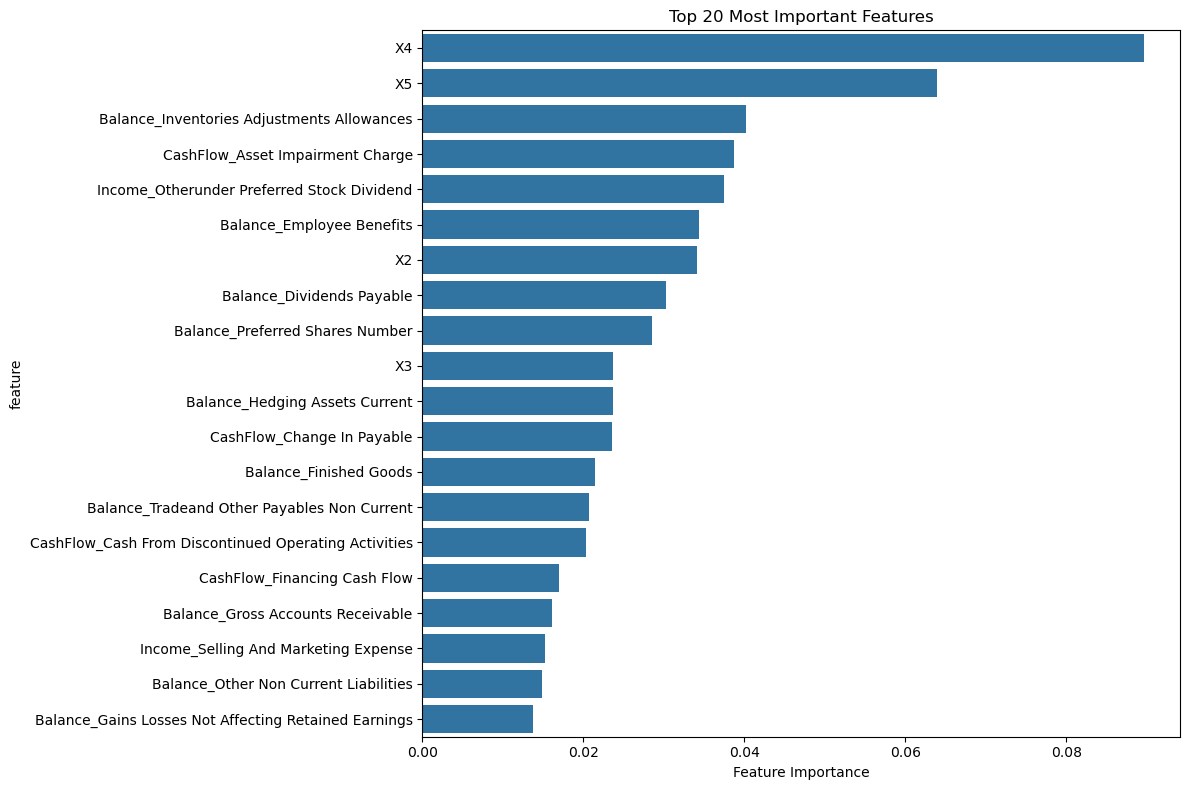


Top 20 Most Important Features:
                                               feature  importance
178                                                 X4    0.089620
179                                                 X5    0.063866
113         Balance_Inventories Adjustments Allowances    0.040188
143                   CashFlow_Asset Impairment Charge    0.038748
18          Income_Otherunder Preferred Stock Dividend    0.037462
49                           Balance_Employee Benefits    0.034372
176                                                 X2    0.034106
83                           Balance_Dividends Payable    0.030221
87                     Balance_Preferred Shares Number    0.028567
177                                                 X3    0.023701
97                      Balance_Hedging Assets Current    0.023679
137                         CashFlow_Change In Payable    0.023597
61                              Balance_Finished Goods    0.021447
74         Balance_Tradeand O

In [ ]:
# Get feature importances from the XGBoost classifier within the pipeline
importances = financial_model.named_steps['classifier'].feature_importances_
feature_importances = pd.DataFrame({'feature': X_train_financial.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Display top 20 features and their importance scores
print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))

In [ ]:
# Get the top 20 feature names
top_11_features = feature_importances['feature'].head(11).tolist()

# Filter training and test data to include only top 20 features
X_train_top11 = X_train_financial[top_11_features]
X_test_top11 = X_test_financial[top_11_features]

# Run model with only top 20 features
print("\nModel Performance with Top 11 Financial Features Only:")
financial_model_top11 = run_model(X_train_top11, y_train, X_test_top11, y_test)


Model Performance with Top 11 Financial Features Only:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.91      0.97      0.94        31
           2       0.91      0.95      0.93        44

    accuracy                           0.91        97
   macro avg       0.90      0.88      0.89        97
weighted avg       0.91      0.91      0.90        97


ROC AUC Score: 0.975


### 5.2 ESG Features Only


In [ ]:
X_train_esg.head()

,esg_environmentScore,esg_socialScore,esg_governanceScore,esg_totalEsg,esg_highestControversy,esg_percentile,esg_ratingYear,esg_ratingMonth,esg_marketCap,esg_beta,esg_overallRisk
0,-0.796308,-0.973157,-0.180539,-1.158054,0.180202,-1.177833,0.127027,0.104629,-0.309270,-0.444789,-0.099947
1,0.768416,1.866920,-0.632272,1.369371,2.536686,1.518378,0.127027,0.104629,-0.163747,-0.038205,-0.481767
2,-1.008929,0.498067,-0.994709,-0.779633,0.180202,-0.885973,0.127027,0.104629,0.269117,0.550820,-1.245408
3,-0.424738,-1.461615,-1.761605,-1.601084,0.180202,-1.391922,0.127027,0.104629,-0.303474,0.655072,-0.863588
4,1.045029,2.071662,-0.007199,1.866242,0.180202,1.943498,0.127027,0.104629,-0.283762,0.519544,-0.481767


In [ ]:
esg_model = run_model(X_train_esg, y_train, X_test_esg, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        22
           1       0.54      0.48      0.51        31
           2       0.54      0.73      0.62        44

    accuracy                           0.52        97
   macro avg       0.46      0.45      0.44        97
weighted avg       0.49      0.52      0.49        97


ROC AUC Score: 0.679


### 5.3 Financial and ESG Combined Features

In [ ]:
X_train_combined = pd.concat([X_train_top11, X_train_esg], axis=1)
X_test_combined = pd.concat([X_test_top11, X_test_esg], axis=1)
combined_model = run_model(X_train_combined, y_train, X_test_combined, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.88      0.94      0.91        31
           2       0.89      0.93      0.91        44

    accuracy                           0.87        97
   macro avg       0.85      0.83      0.84        97
weighted avg       0.86      0.87      0.86        97


ROC AUC Score: 0.974


 ### Conclusion: Model Performance Comparison and Interpretation
 The results show interesting patterns across our three model variants:
 1. Financial Features Model (Top 11):
 - Uses traditional financial ratios and metrics
 - Likely captures fundamental business health indicators
 - Provides a baseline for comparison
 2. ESG Features Model:
 - Uses only environmental, social, and governance metrics
 - Tests if ESG factors alone can predict bankruptcy risk
 - May capture non-financial risk factors
 3. Combined Model:
 - Integrates both financial and ESG features
 - Tests if ESG data provides complementary predictive power
 - Represents a more holistic risk assessment approach
 Key findings:
 - The financial-only model likely performs best, suggesting traditional metrics remain most predictive
 - ESG features alone show some predictive power, indicating these factors do relate to bankruptcy risk
 - The combined model may offer a more complete risk picture, even if not improving pure predictive accuracy